In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import random
import seaborn as sns

from scipy import stats, integrate

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

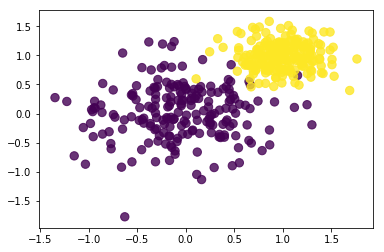

In [ ]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

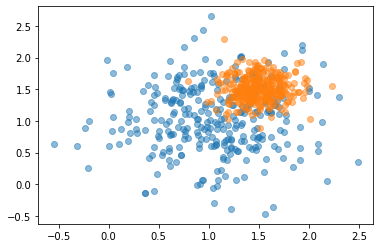

In [5]:
def generate_data(mean_1=1, mean_2=1.5, std_1=0.5, std_2=0.2, num_samples=300):
  set_1 = np.random.normal(loc=mean_1, scale=std_1, size=(num_samples,2))
  set_2 = np.random.normal(loc=mean_2, scale=std_2, size=(num_samples,2))
  return (set_1, set_2)

data_1, data_2 = generate_data()

fig, ax = plt.subplots()
ax.scatter(data_1[:,0], data_1[:,1], alpha=0.5)
ax.scatter(data_2[:,0], data_2[:,1], alpha=0.5)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [ ]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [4]:
path = "data/residuals_261.pkl"
pickle_data = np.array(np.load(path, allow_pickle=True), ndmin=1)
data = pickle_data[0]

df = pd.DataFrame(data=data, columns=['residuals', 'distances'])
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [5]:
cleaned_df = df[abs(df['residuals']) < 2]
cleaned_df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


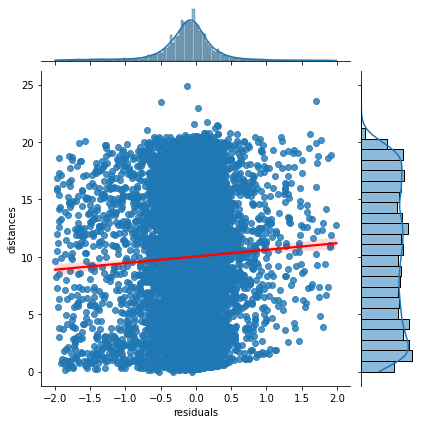

In [77]:
slope, intercept, _, _, _ = stats.linregress(cleaned_df['residuals'], cleaned_df['distances'])
sns.jointplot(x='residuals', y='distances', data=cleaned_df, kind='reg', line_kws={'label': 'y={0:.3f}x+{1:.3f}'.format(slope, intercept), 'color': 'red'})

We could infer that the correlation between the two variables is very low but present

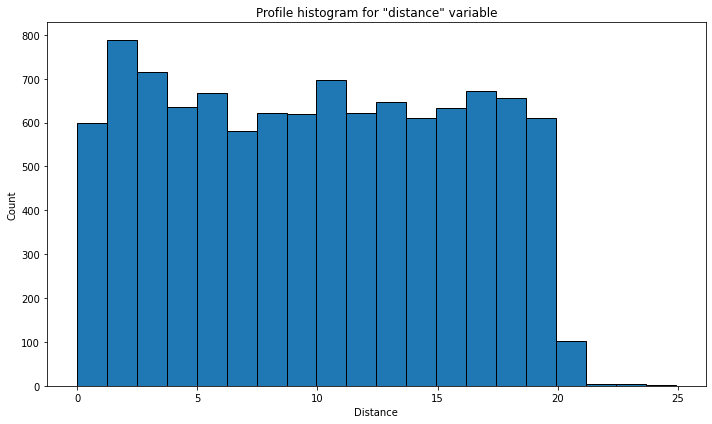

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

h, bins, _ = plt.hist(cleaned_df['distances'], bins=20, edgecolor='k')

ax.set_title('Profile histogram for \"distance\" variable')
ax.set_xlabel('Distance')
ax.set_ylabel('Count')

fig.tight_layout()

In [79]:
x = []
y = []
err_y = []

for i in range(len(bins)-1):
  l = bins[i]
  r = bins[i+1]

  x.append((l+r)/2)
  y.append(cleaned_df[(cleaned_df['distances'] >= l) & (cleaned_df['distances'] <= r)]['residuals'].mean())
  err_y.append(cleaned_df[(cleaned_df['distances'] >= l) & (cleaned_df['distances'] <= r)]['residuals'].std())

x = np.array(x)
y = np.array(y)
err_y = np.array(err_y)

print("x values: \n", x)
print("\ny values: \n", y)
print("\nerr_y values: \n", err_y)

x values: 
 [ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775]

y values: 
 [-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714 -0.12857143]

err_y values: 
 [0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]


<ErrorbarContainer object of 3 artists>

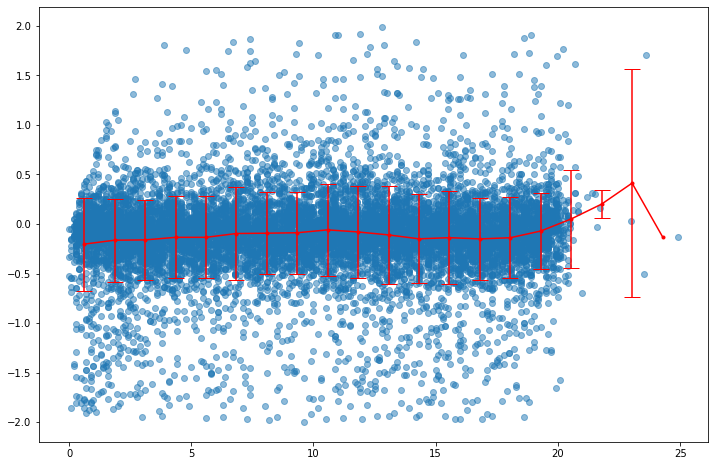

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(cleaned_df['distances'], cleaned_df['residuals'], alpha=0.5)
ax.errorbar(x=x, y=y, yerr=err_y, fmt='.-', color='red', capsize=8)

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


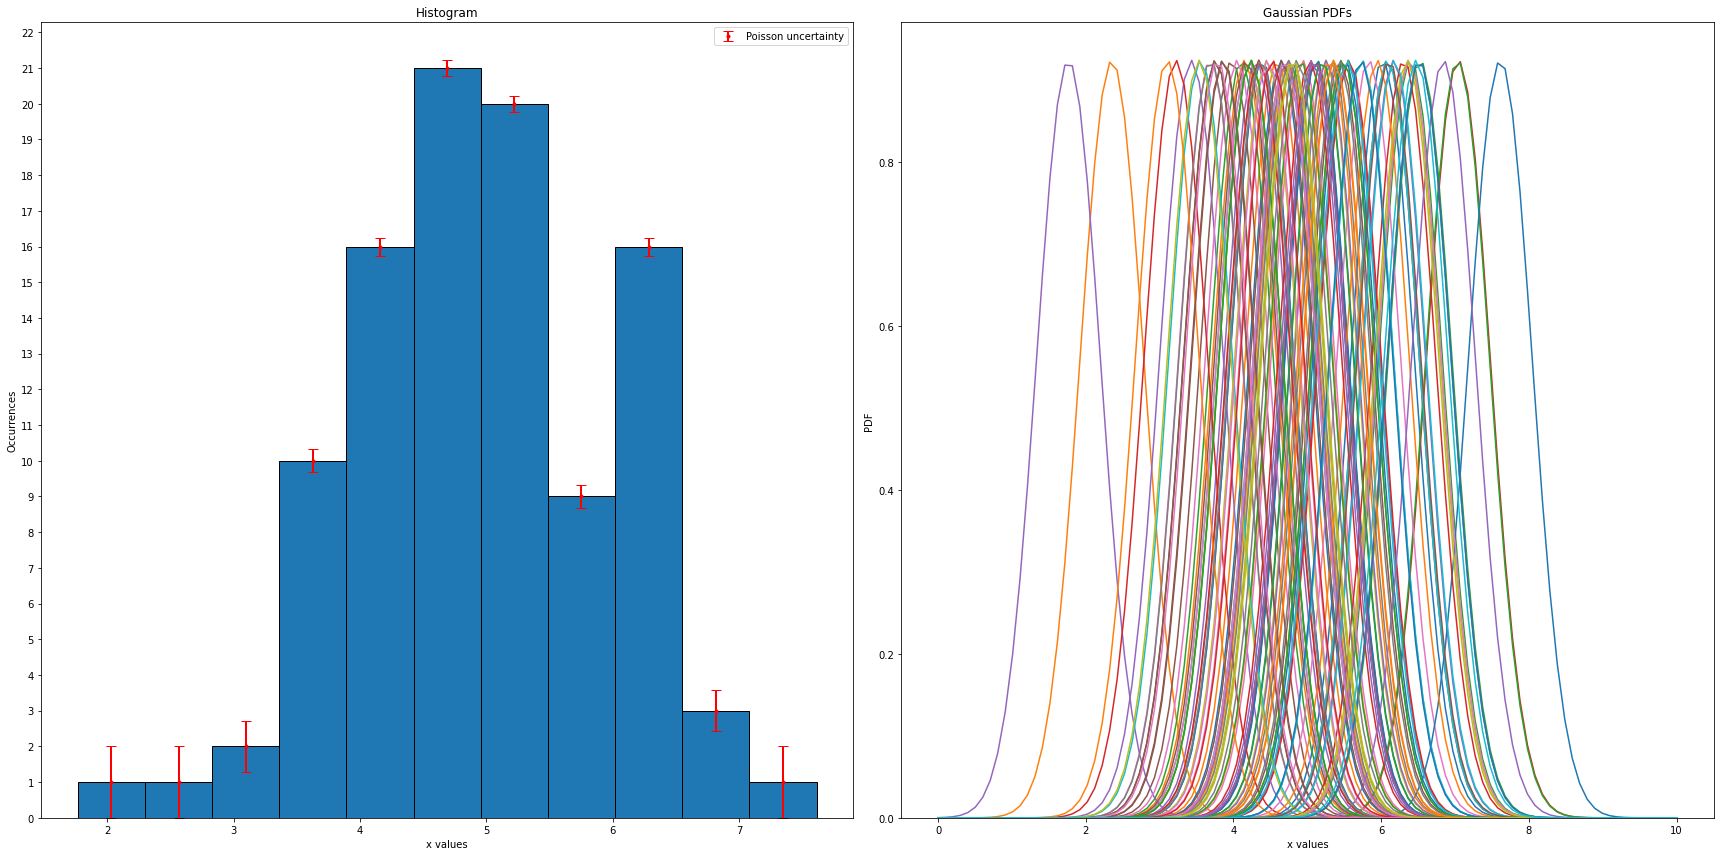

In [69]:
mean = 5
std = 1
N = 100

x = np.random.normal(loc=mean, scale=std, size=N)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
h, bins, _ = ax[0].hist(x, bins='auto', histtype='bar', edgecolor='k')

centers = (bins[1:]+bins[:-1])/2
err_y = 1/np.sqrt(h)#np.divide(np.ones(len(h)), np.sqrt(h), where=h!=0)

ax[0].errorbar(centers, h, err_y, fmt='.', color='red', linewidth=2, capsize=5, label='Poisson uncertainty')
ax[0].set_title('Histogram')
ax[0].set_xlabel('x values')
ax[0].set_ylabel('Occurrences')
ax[0].yaxis.set_major_locator(MultipleLocator(1))
ax[0].legend()

def_std = 1.06 * np.std(x) * (N**-0.2)

sum_pdfs = np.zeros(N)
x_space = np.linspace(start=0, stop=10, num=N)
for x_elem in x:
  pdf = stats.norm.pdf(x_space, x_elem, def_std)
  sum_pdfs += pdf
  ax[1].plot(x_space, pdf)

ax[1].set_title('Gaussian PDFs')
ax[1].set_xlabel('x values')
ax[1].set_ylabel('PDF')
ax[1].set(ylim=0)

fig.tight_layout()

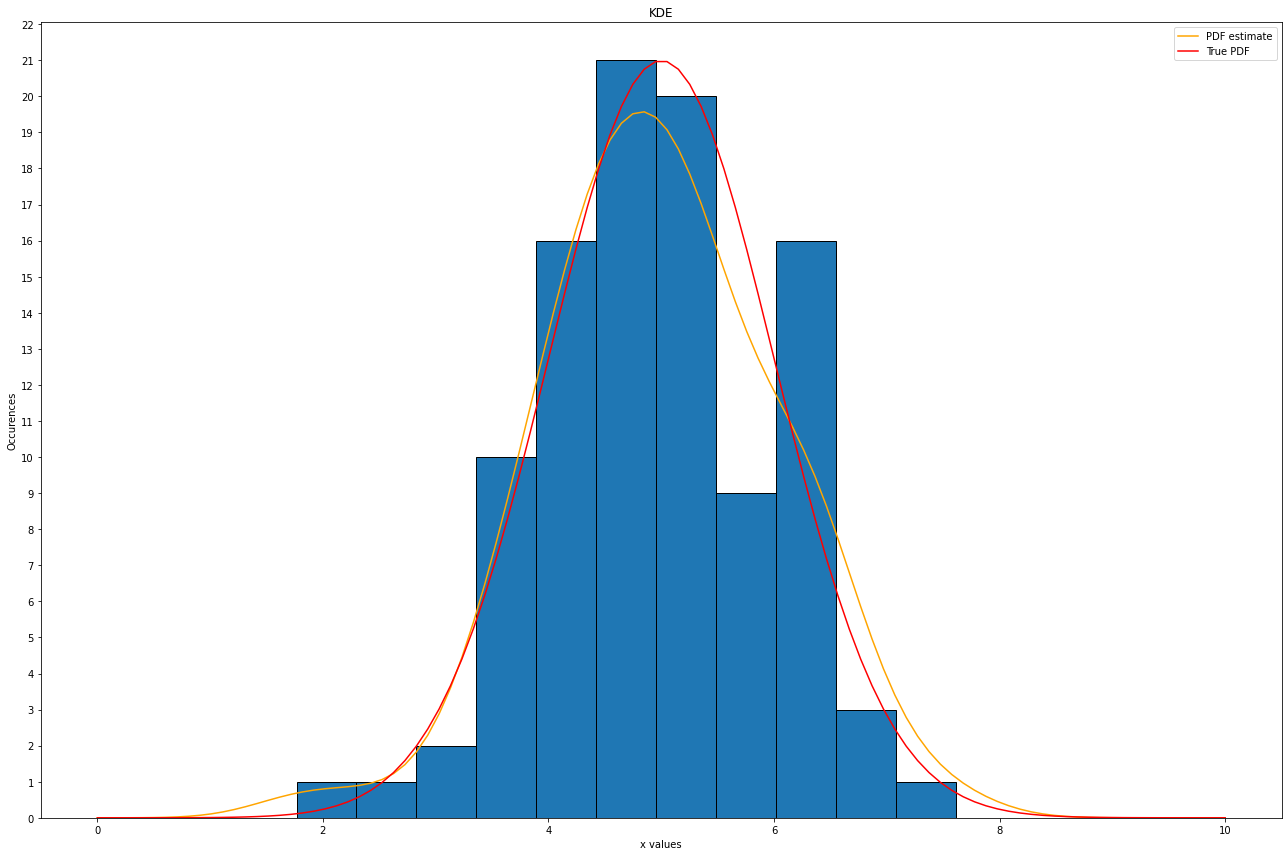

In [80]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.hist(x, bins='auto', histtype='bar', edgecolor='k')

hist_area = integrate.trapz(h, centers)

sum_pdfs_area = integrate.trapz(sum_pdfs, x_space)
sum_pdfs = sum_pdfs/sum_pdfs_area * hist_area
ax.plot(x_space, sum_pdfs, color='orange', label='PDF estimate')

true_pdf = stats.norm.pdf(x_space, mean, std)
true_area = integrate.trapz(true_pdf, x_space)
true_pdf = true_pdf/true_area * hist_area

ax.plot(x_space, true_pdf, color='red', label='True PDF')

ax.set_title('KDE')
ax.set_xlabel('x values')
ax.set_ylabel('Occurences')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.legend()

fig.tight_layout()